# Point Processes

**Author: Serge Rey <sjsrey@gmail.com> and Wei Kang <weikang9009@gmail.com>**

## Introduction

One philosophy of applying inferential statistics to spatial data is to think in terms of spatial processes and their possible realizations. In this view, an observed map pattern is one of the possible patterns that might have been generated by a hypothesized process. In this notebook, we are going to regard point patterns as the outcome of point processes. There are three major types of point process, which will result in three types of point patterns:

* [Random Patterns](#Random-Patterns)
* [Clustered Patterns](#Clustered-Patterns)
* [Regular Patterns](#Regular-Patterns)

We will investigate how to generate these point patterns via simulation (Data Generating Processes (DGP) is the correponding point process), and inspect how these resulting point patterns differ from each other visually. In [Quadrat statistics notebook](Quadrat_statistics.ipynb) and [distance statistics notebook](distance_statistics.ipynb), we will adpot some statistics to infer whether it is a [Complete Spaital Randomness](https://en.wikipedia.org/wiki/Complete_spatial_randomness) (CSR) process.

A python file named "process.py" contains several point process classes with which we can generate point patterns of different types.

In [1]:
from pointpats import PoissonPointProcess, PoissonClusterPointProcess, Window, poly_from_bbox, PointPattern
import libpysal as ps
from libpysal.cg import shapely_ext
%matplotlib inline
import numpy as np
#import matplotlib.pyplot as plt

## Random Patterns

Random point patterns are the outcome of CSR. CSR has two major characteristics:
1. Uniform: each location has equal probability of getting a point (where an event happens)
2. Independent: location of event points are independent

It usually serves as the null hypothesis in testing whether a point pattern is the outcome of a random process.

There are two types of CSR:
* $N$-conditioned CSR: $N$  is fixed
    * Given the total number of events $N$ occurring within an area $A$, the locations of the $N$ events represent an independent random sample of $N$ locations where each location is equally likely to be chosen as an event.
* $\lambda$-conditioned CSR: $N$ is randomly generated from a Poisson process.
    * The number of events occurring within a finite region $A$ is a random variable $\dot{N}$ following a Poisson distribution with mean $\lambda|A|$, with $|A|$ denoting area of $A$ and $\lambda$ denoting the intensity of the point pattern.
    * Given the total number of events $\dot{N}$ occurring within an area $A$, the locations of the $\dot{N}$ events represent an independent random sample of $\dot{N}$ locations where each location is equally likely to be chosen as an event.

### Simulating CSR
We are going to generate several point patterns (200 events) from CSR within Virginia state boundary.

In [2]:
# open the virginia polygon shapefile
va = ps.io.open(ps.examples.get_path("virginia.shp"))
polys = [shp for shp in va]

In [3]:
# Create the exterior polygons for VA from the union of the county shapes
state = shapely_ext.cascaded_union(polys)

In [4]:
# create window from virginia state boundary
window = Window(state.parts)

#### 1. Generate a point series from N-conditioned CSR 

In [5]:
# simulate a csr process in the same window (200 points, 1 realization)
# by specifying "asPP" false, we can generate a point series
# by specifying "conditioning" false, we can simulate a N-conditioned CSR
np.random.seed(5)
samples = PoissonPointProcess(window, 200, 1, conditioning=False, asPP=False)
samples

In [6]:
samples.realizations[0] # simulated event points

array([[-76.3326571 ,  36.57893856],
       [-81.93206633,  37.0243966 ],
       [-79.55664806,  37.35242254],
       [-78.5166233 ,  37.55701527],
       [-77.21660795,  38.26514268],
       [-82.09226973,  37.00701809],
       [-77.44823305,  38.6714618 ],
       [-79.95384378,  37.99268412],
       [-81.36397951,  37.03187854],
       [-78.37289635,  38.78731506],
       [-78.78567678,  37.07057506],
       [-78.61625258,  36.89065808],
       [-82.45957129,  36.95802405],
       [-77.77370645,  37.01124988],
       [-78.80401745,  38.78711285],
       [-78.2800756 ,  37.64869473],
       [-76.33475868,  37.41755285],
       [-79.71621808,  37.22853963],
       [-80.31108929,  36.90895769],
       [-76.81331831,  37.13340462],
       [-77.17489798,  37.62727824],
       [-79.58599474,  37.17903022],
       [-78.34778262,  37.31439593],
       [-76.78862975,  36.56978482],
       [-78.90167513,  38.14339807],
       [-78.31750801,  38.6042175 ],
       [-80.63065732,  37.39418456],
 

In [7]:
# build a point pattern from the simulated point series
pp_csr = PointPattern(samples.realizations[0])
pp_csr

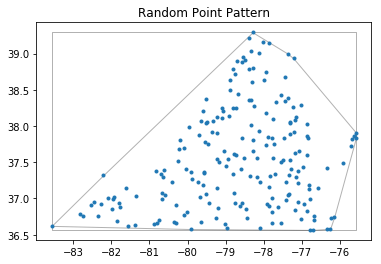

In [8]:
pp_csr.plot(window=True, hull=True, title='Random Point Pattern')

In [9]:
pp_csr.n

200

#### 2. Generate a point series from $\lambda$-conditioned CSR

In [10]:
# simulate a csr process in the same window (200 points, 1 realization)
# by specifying "asPP" false, we can generate a point series
# by specifying "conditioning" True, we can simulate a lamda-conditioned CSR
np.random.seed(5)
samples = PoissonPointProcess(window, 200, 1, conditioning=True, asPP=False)
samples

In [11]:
samples.realizations[0] # simulated points

array([[-79.55664806,  38.25720619],
       [-78.5166233 ,  38.30532302],
       [-77.21660795,  37.57582983],
       [-77.44823305,  36.74925133],
       [-79.95384378,  37.55525777],
       [-81.36397951,  36.71747455],
       [-80.18215183,  37.35242254],
       [-78.37289635,  38.26514268],
       [-78.78567678,  38.80097021],
       [-78.61625258,  38.36290302],
       [-81.43369537,  37.00701809],
       [-81.95031135,  37.07057506],
       [-77.77370645,  36.89065808],
       [-78.80401745,  38.72566936],
       [-79.32844778,  36.95802405],
       [-78.2800756 ,  38.90863979],
       [-81.49037579,  36.99262809],
       [-76.90806444,  37.72828737],
       [-77.17489798,  37.64869473],
       [-79.58599474,  37.9904752 ],
       [-78.34778262,  37.22853963],
       [-76.78862975,  37.8189276 ],
       [-78.90167513,  36.90895769],
       [-78.31750801,  37.13340462],
       [-75.86084614,  37.62727824],
       [-75.97937462,  37.17903022],
       [-79.0679983 ,  38.62297192],
 

In [12]:
# build a point pattern from the simulated point series
pp_csr = PointPattern(samples.realizations[0])
pp_csr

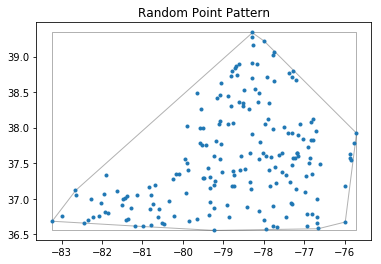

In [13]:
pp_csr.plot(window=True, hull=True, title='Random Point Pattern')

In [14]:
pp_csr.n

188

The simulated point pattern has $194$ events rather than the Possion mean $200$.

#### 3. Generate a point pattern from N-conditioned CSR 

In [15]:
# simulate a csr process in the same window (200 points, 1 realization)
# by specifying "asPP" True, we can generate a point pattern
# by specifying "conditioning" false, we can simulate a N-conditioned CSR
np.random.seed(5)
samples = PoissonPointProcess(window, 200, 1, conditioning=False, asPP=True)
samples

In [16]:
pp_csr = samples.realizations[0] # simulated point pattern
pp_csr

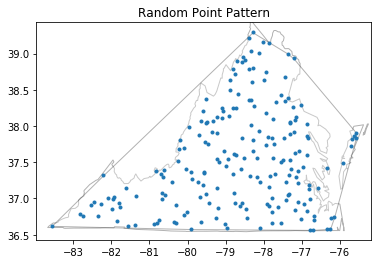

In [17]:
pp_csr.plot(window=True, hull=True, title='Random Point Pattern')

In [18]:
pp_csr.n

200

#### 4. Generate a point pattern of size 200 from a $\lambda$-conditioned CSR

In [19]:
# simulate a csr process in the same window (200 points, 1 realization)
# by specifying "asPP" True, we can generate a point pattern
# by specifying "conditioning" True, we can simulate a lamda-conditioned CSR
np.random.seed(5)
samples = PoissonPointProcess(window, 200, 1, conditioning=True, asPP=True)
samples

In [20]:
pp_csr = samples.realizations[0] # simulated point pattern
pp_csr

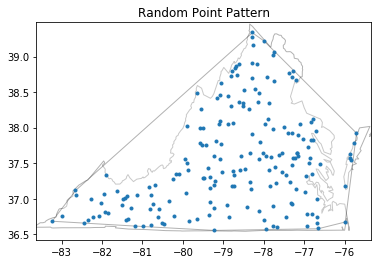

In [21]:
pp_csr.plot(window=True, hull=True, title='Random Point Pattern')

In [22]:
pp_csr.n

188

## Clustered Patterns

Clustered Patterns are more grouped than random patterns. Visually, we can observe more points at short distances. There are two sources of clustering:

* Contagion: presence of events at one location affects probability of events at another location (correlated point process)
* Heterogeneity: intensity $\lambda$ varies with location (heterogeneous Poisson point process)

We are going to focus on simulating correlated point process in this notebook. One example of correlated point process is Poisson cluster process. Two stages are involved in simulating a Poisson cluster process. First, parent events are simulted from a $\lambda$-conditioned or $N$-conditioned CSR. Second, $n$ offspring events for each parent event are simulated within a circle of radius $r$ centered on the parent. Offspring events are independently and identically distributed.

#### 1. Simulate a Poisson cluster process of size 200 with 10 parents and 20 children within 0.5 units of each parent (parent events:  $N$-conditioned CSR)

In [23]:
np.random.seed(5)
csamples = PoissonClusterPointProcess(window, 200, 10, 0.5, 1, asPP=True, conditioning=False)
csamples

In [24]:
csamples.parameters #number of total events for each realization 

{0: {'n': 200}}

In [25]:
csamples.num_parents #number of parent events for each realization 

{0: 10}

In [26]:
csamples.children # number of children events centered on each parent event

20

In [27]:
pp_pcp = csamples.realizations[0]
pp_pcp

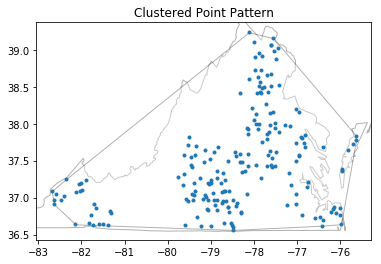

In [28]:
pp_pcp.plot(window=True, hull=True, title='Clustered Point Pattern') #plot the first realization

It is obvious that there are several clusters in the above point pattern.

#### 2. Simulate a Poisson cluster process of size 200 with 10 parents and 20 children within 0.5 units of each parent (parent events:  $\lambda$-conditioned CSR)

In [29]:
import numpy as np
np.random.seed(10)
csamples = PoissonClusterPointProcess(window, 200, 10, 0.5, 1, asPP=True, conditioning=True)
csamples

In [30]:
csamples.parameters #number of events for the realization might not be equal to 200

{0: {'n': 260}}

In [31]:
csamples.num_parents #number of parent events for the realization, not equal to 10

{0: 13}

In [32]:
csamples.children # number of children events centered on each parent event

20

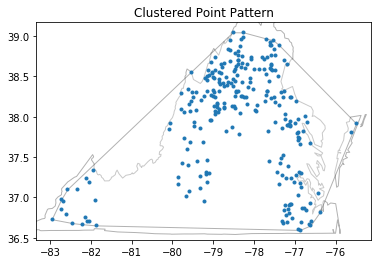

In [33]:
pp_pcp = csamples.realizations[0]
pp_pcp.plot(window=True, hull=True, title='Clustered Point Pattern')

#### 3. Simulate a Poisson cluster process of size 200 with 5 parents and 40 children within 0.5 units of each parent (parent events:  $N$-conditioned CSR)

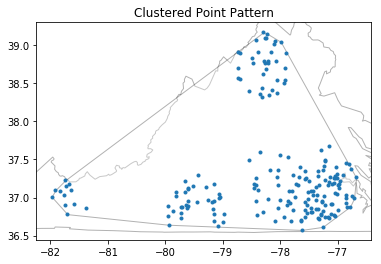

In [34]:
np.random.seed(10)
csamples = PoissonClusterPointProcess(window, 200, 5, 0.5, 1, asPP=True)
pp_pcp = csamples.realizations[0]
pp_pcp.plot(window=True, hull=True, title='Clustered Point Pattern')